<a href="https://colab.research.google.com/github/AgustinCocciardi/IA-Aplicada/blob/main/02_Introduccion_a_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**HACER UNA COPIA para correr resultados**:

Archivo -> Hacer una copia en drive

## Twitter Sentiment Analysis Dataset

Para cargar palabras individuales necesitamos una estructura de datos que nos permita ver palabras de manera unica para ser comparada a un array de caracteres...


En la proxima seccion vamos a aplicar tecnicas de NLP simbolicas y estadísticas para hacer predicciones binarias en textos. Vamos a ver el dataset [Twitter Sentiment Analysis](https://huggingface.co/datasets/carblacac/twitter-sentiment-analysis) que es un dataset armado por la universidad de Michigan y kaggle a partir de un corpus de tweets proporcionado por Niek Sanders. Este dataset se aplica clasificacion binaria en la que etiqueta como positivo (1) o negativo (0).   


Vamos a usar la biblioteca [NLTK Python library](https://www.nltk.org) que implementas estas ideas simbolicas y estadisticas de NLP aplicando el workflow de trabajo clásico de NLP.

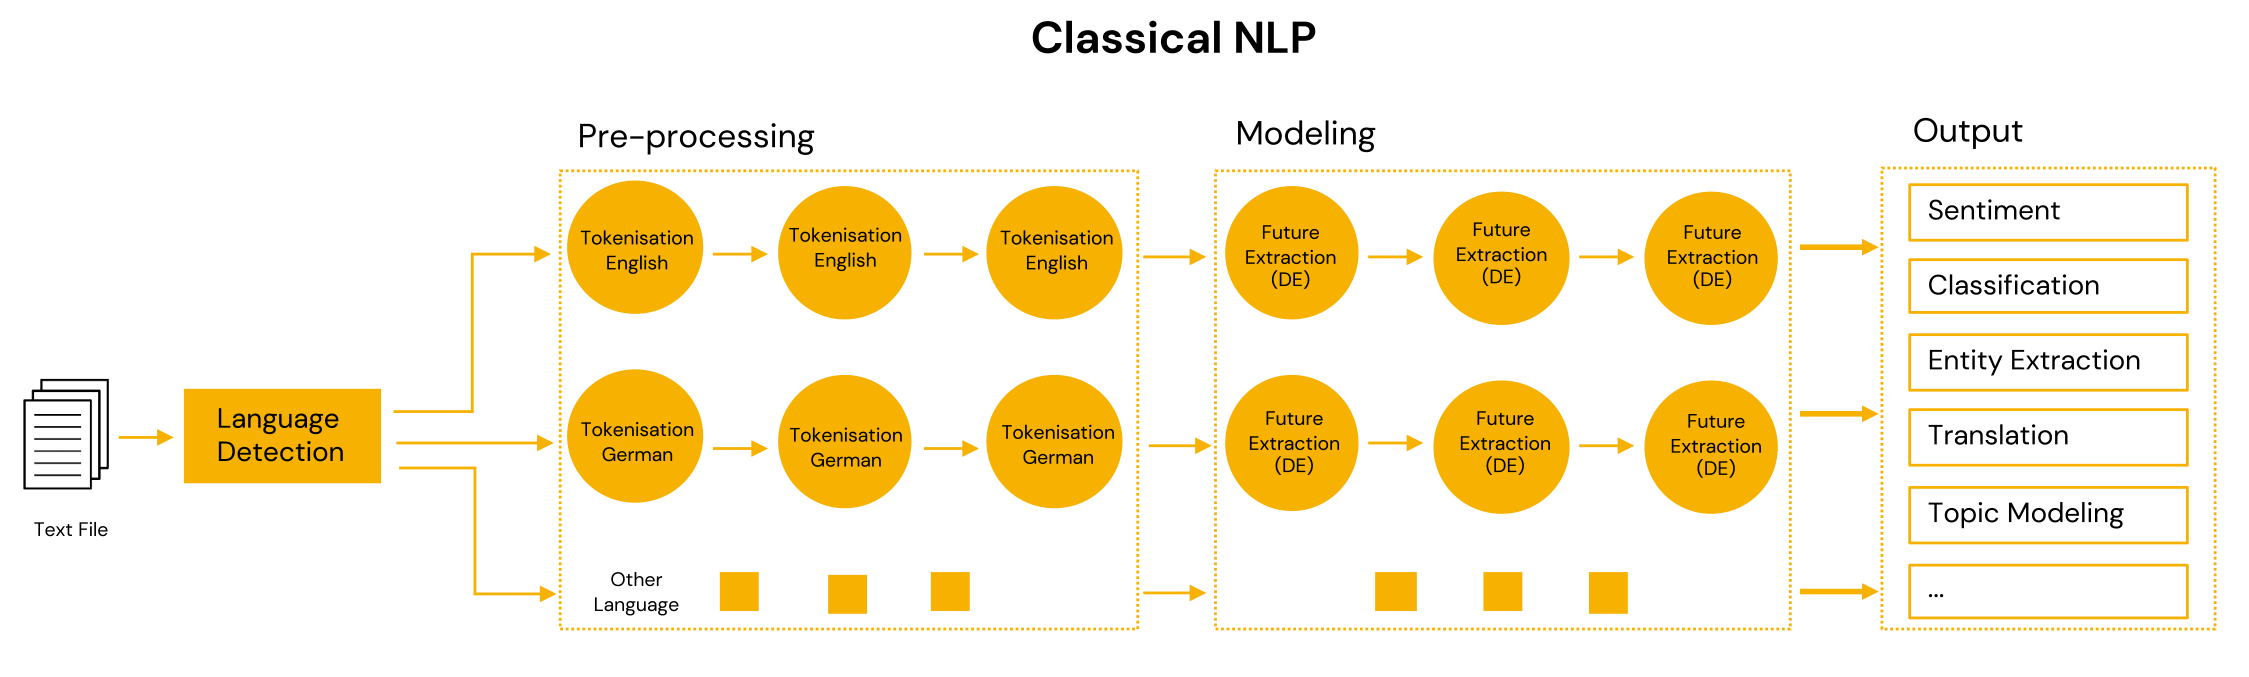

In [1]:
# Setup
# Instalamos todas las dependencias que se van a usar en todo el tutorial
%%capture
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('word2vec_sample')
!pip install datasets

In [2]:
# importamos las depedencias de nltk and pandas
import pandas as pd
import nltk

In [3]:
# Descargamos el dataset y creamos un Pandas Dataframe
%%capture
from datasets import load_dataset
from sklearn.model_selection import train_test_split
import numpy as np

dataset = load_dataset("carblacac/twitter-sentiment-analysis", "None")
# Stratified Sample of Dataset
datapoints = 10000

X_train, _, y_train, _ = train_test_split(dataset["validation"]["text"], dataset["validation"]["feeling"],
                                                    train_size=datapoints, random_state=0,
                                                    stratify=dataset["validation"]["feeling"])

df = pd.DataFrame({"text": X_train, "positive": y_train})
df["positive"] = df["positive"].astype("bool")

# Liberamos memoria del dataset descargado porque lo tenemos disponible en el dataframe de pandas.
dataset = None

The repository for carblacac/twitter-sentiment-analysis contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/carblacac/twitter-sentiment-analysis.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


In [4]:
# Veamos que tiene el dataset
df

,text,positive
0,@mikabee1103 LOL found her! I'm glad pro pictu...,False
1,Nooooooooooo rain! Please stop raining before ...,False
2,Home on the island,True
3,I'm going back to my facebook page. This is bo...,False
4,Laying back down,True
...,...,...
9995,@pmolyneux You guys have been working on Dimit...,True
9996,"@pandamares uh oh...What did Heaven do? And, ...",False
9997,aww crap ... gotta put the new clean sheets an...,False
9998,@marcforrest we're both taking great kid photo...,True


In [5]:
# Extraemos una observación del dataset
sample =  df.sample(1, random_state=34)
text = sample["text"].iat[0].split(".")
positive = sample["positive"].iat[0]


for line in text:
    print(line)

print(f"Positive Feeling? - {positive}")

ready to go home and yes once again, thank God its Friday
Positive Feeling? - True


## Symbolic NLP - Analisis de datos exploratorios
Vamos a hacer una lista de todas las palabras contenidas en el corpus.


In [6]:
# Intuición principal en este tipo de tecnicas: Contar las ocurrencias de las palabras.
from collections import defaultdict, Counter
from tqdm import tqdm

# Instanciamos un contador de python
word_counts = Counter()

for row in tqdm(df.iterrows(), total=len(df)):
    text = row[1]

    # Usamos la funcion implementada en pandas split() para separar palabras por espacios en blanco.
    for word in text.str.split()[0]:
        word_counts[word] += 1

len(word_counts)

  0%|          | 0/10000 [00:00<?, ?it/s]<ipython-input-6-c21c8382b283>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  for word in text.str.split()[0]:
100%|██████████| 10000/10000 [00:03<00:00, 3020.20it/s]


30340

In [7]:
# Tomamos las 25 palabras más comunes
word_counts.most_common(25)

[('to', 3413),
 ('I', 3212),
 ('the', 3013),
 ('a', 2366),
 ('my', 1793),
 ('and', 1707),
 ('i', 1611),
 ('is', 1372),
 ('for', 1313),
 ('you', 1289),
 ('in', 1262),
 ('it', 1156),
 ('of', 1060),
 ('on', 984),
 ('have', 840),
 ('me', 812),
 ('so', 776),
 ('that', 712),
 ('at', 682),
 ('but', 670),
 ('with', 667),
 ('be', 661),
 ('was', 638),
 ("I'm", 629),
 ('just', 596)]

¿ Que podemos observar en esa lista ?

Tenemos muchas ocurrencias de palabras que no aportan valor, articulos, conectores etc.

Probemos usar un tokenizador (Split) de NLTK que aplica reglas symbolicas de NLP para quitar algunas palabras.

In [8]:
from nltk import word_tokenize

In [9]:
word_counts = Counter()

for row in tqdm(df.iterrows(), total=len(df)):
    text = row[1].iat[0]
    for word in word_tokenize(text):
        word_counts[word] += 1

len(word_counts)

100%|██████████| 10000/10000 [00:05<00:00, 1847.80it/s]


22764

Con la función word_tokenize tenemos 22764 palabras contra 30340 sin aplicar ninguna regla

In [10]:
word_counts.most_common(25)

[('!', 5790),
 ('.', 5130),
 ('@', 5013),
 ('I', 4193),
 ('to', 3439),
 (',', 3068),
 ('the', 3032),
 ('a', 2376),
 ('i', 1947),
 ('?', 1849),
 ('my', 1814),
 ('it', 1761),
 ('and', 1757),
 ('you', 1614),
 ('is', 1446),
 ('...', 1415),
 ('for', 1323),
 ('in', 1293),
 ("'s", 1179),
 ("n't", 1104),
 ('of', 1072),
 ('on', 1029),
 ('me', 1027),
 (';', 994),
 ('have', 904)]

En este punto tenemos todavía muchas palabras que no aportan valor. Por lo que nos damos cuenta que en NLP simbolica hay que trabajar bastante y de manera manual los datasets para eliminar palabras que nos sirvan para clasificar sentimientos. También hay que considerar que hay que tratar uniformemente a las palabras independientemente si son mayusculas o minusculas. Por lo tanto, en la próxima sección se va a tratar todo en lowercase.

### Vamos a aplicar algunos tips de statistical NLP
Las palabras más comunes son probablemente menos utiles para hacer predicciones. Por suerte, tenemos herramientas en NLTK para quitarlas. Estas plabras comunes se las llama stopwords. Es un conjunto de palabras que no aportan valor y son acordadas por la comunidad para quitarlas en los problemas de NLP.

In [11]:
from nltk.corpus import stopwords

stopwords_en = stopwords.words('english')

word_counts = Counter()

for row in tqdm(df.iterrows(), total=len(df)):
    text = row[1].iat[0]

    for word in word_tokenize(text):
        word_lowercase = word.lower()

        if word_lowercase not in stopwords_en:
            word_counts[word_lowercase] += 1

len(word_counts)

100%|██████████| 10000/10000 [00:03<00:00, 2563.20it/s]


19538

In [12]:
word_counts.most_common(10)

[('!', 5790),
 ('.', 5130),
 ('@', 5013),
 (',', 3068),
 ('?', 1849),
 ('...', 1415),
 ("'s", 1187),
 ("n't", 1110),
 (';', 994),
 ('&', 861)]

Si revisamos el anterior output seguimos teniendo simbolos, luego de quitar las stopwords. Por lo tanto, vamos a unir los simbolos de puntuacion de python a nuestras stopwords  

In [13]:
from string import punctuation

# Hacemos una union entre conjunto de caracteres de puntuacion nativos a nuestro conjunto de stopwords usando la operation union de sets de datos.
stopwords_en = set(stopwords_en).union(set(punctuation))

word_counts = Counter()

for row in tqdm(df.iterrows(), total=len(df)):
    text = row[1].iat[0]

    for word in word_tokenize(text):
        word_lowercase = word.lower()

        if word_lowercase not in stopwords_en:
            word_counts[word_lowercase] += 1

len(word_counts)

100%|██████████| 10000/10000 [00:07<00:00, 1394.59it/s]


19510

In [14]:
word_counts.most_common(10)

[('...', 1415),
 ("'s", 1187),
 ("n't", 1110),
 ("'m", 839),
 ('..', 617),
 ('get', 535),
 ('good', 531),
 ('day', 507),
 ('like', 469),
 ('got', 442)]

### Stemming and Lemmatization

Ahora vamos a ver dos operaciones  más para simplificar nuestro vocabulario:


*   **Stemming**: Eliminar todos los sufijos, plurales y conjugaciones de una palabra y dejar sólo la raíz (stem):
    *   meeting --> meet
    *   meets --> meet
    *   meet --> meet
    *   caring --> car

*   **Lemmatization**: Primero realiza el análisis sintáctico de la palabra y luego elimina las derivaciones realizadas en la palabra:
    * meeting (Verb) --> meet
    * meeting (Noun) --> Meeting
    * caring (Verb)  --> care

Como hacemos análisis sintáctico con symbolic NLP? Como lo hacíamos en el primario. Buscar Part of Speech en NLP.


In [15]:
# Usamos Stemming
from nltk.stem import PorterStemmer

porter = PorterStemmer()

word_counts = Counter()

for row in tqdm(df.iterrows(), total=len(df)):
    text = row[1].iat[0]

    for word in word_tokenize(text):
        word_lowercase = word.lower()

        if word_lowercase not in stopwords_en:
            stemmed_word = porter.stem(word_lowercase)
            word_counts[stemmed_word] += 1

len(word_counts)

100%|██████████| 10000/10000 [00:05<00:00, 1756.52it/s]


17015

In [16]:
# Veamos un ejemplo de como funciona la operación de stemming con palabras individuales que le pasamos:
print("meeting --> ", porter.stem("meeting"))
print("meets --> ", porter.stem("meets"))
print("the meeting --> ", porter.stem("the meeting"))
print("caring --> ", porter.stem("caring"))

meeting -->  meet
meets -->  meet
the meeting -->  the meet
caring -->  care


Veamos como seguimos refinando nuestro corpus de palabras:

In [17]:
word_counts.most_common(10)

[('...', 1415),
 ("'s", 1187),
 ("n't", 1110),
 ('go', 869),
 ("'m", 839),
 ('get', 703),
 ('day', 627),
 ('..', 617),
 ('good', 537),
 ('like', 501)]

Sigamos operando nuestro corpus, ahora aplicando la operación Lemmatization:

In [18]:
#Usemos Lemmatization:

from nltk import pos_tag
from nltk.stem import WordNetLemmatizer

wnl = WordNetLemmatizer()

def penn2morphy(penntag):
    """ Converts Penn Treebank tags to WordNet. """
    morphy_tag = {'NN':'n', 'JJ':'a',
                  'VB':'v', 'RB':'r'}
    try:
        return morphy_tag[penntag[:2]]
    except:
        return 'n'

word_counts = Counter()

for row in tqdm(df.iterrows(), total=len(df)):
    text = row[1].iat[0]

    for word, tag in pos_tag(word_tokenize(text)):
        word_lemmatized = wnl.lemmatize(word.lower(), pos=penn2morphy(tag))

        if word_lemmatized not in stopwords_en:
            word_counts[word_lemmatized] += 1

len(word_counts)

100%|██████████| 10000/10000 [00:18<00:00, 529.52it/s]


17852

In [19]:
# Veamos Lemmatization en detalle, podemos observar cada palabra y el tag que le agrego (Noun, Verb etc).
text = """Deep in the forest, the council is meeting for the first time since the 'event'.\n
          Right when the meeting commences, a long howl disrupts and snaps them to immediate attention and the mages ..."""

text_lemmatized = ""
for word, tag in pos_tag(word_tokenize(text)):
    word_lemmatized = wnl.lemmatize(word.lower(), pos=penn2morphy(tag))
    text_lemmatized += f"{word} ({tag}, {word_lemmatized}) "

print(text_lemmatized)

Deep (NNP, deep) in (IN, in) the (DT, the) forest (NN, forest) , (,, ,) the (DT, the) council (NN, council) is (VBZ, be) meeting (VBG, meet) for (IN, for) the (DT, the) first (JJ, first) time (NN, time) since (IN, since) the (DT, the) 'event (NN, 'event) ' (POS, ') . (., .) Right (RB, right) when (WRB, when) the (DT, the) meeting (NN, meeting) commences (NNS, commences) , (,, ,) a (DT, a) long (JJ, long) howl (NN, howl) disrupts (NNS, disrupts) and (CC, and) snaps (VB, snap) them (PRP, them) to (TO, to) immediate (VB, immediate) attention (NN, attention) and (CC, and) the (DT, the) mages (NNS, mages) ... (:, ...) 


Para profundizar sobre pos tagger que realizan el análisis sintáctico (Part of Speech tagging), pueden acceder a este [Blog post](https://explosion.ai/blog/part-of-speech-pos-tagger-in-python).

## Statistical NLP - Entrenamos Machine Learning models en textos

Hasta ahora hicimos un preprocesamiento simbolico para simplificar nuestro corpus de texto.

Vamos a probar un modelo muy simple. El problema que queremos resolver es que nuestro modelo encuentre una relacion entre la palabra amor en el texto y que el tweet exprese un sentimiento positivo.

In [20]:
X = []
y = []

for row in tqdm(df.iterrows(), total=len(df)):
    text = row[1].iat[0]
    x = 0

    for word, tag in pos_tag(word_tokenize(text)):
        word_lemmatized = wnl.lemmatize(word.lower(), pos=penn2morphy(tag))

        if word_lemmatized == "love":
            x += 1

    X.append(x)
    y.append(row[1].iat[1])

100%|██████████| 10000/10000 [00:19<00:00, 519.85it/s]


In [21]:
# Vamos a definir un conjunto de train y test significativo:

from sklearn.model_selection import train_test_split
import numpy as np


X_train, X_test, y_train, y_test = train_test_split(np.array(X).reshape(-1, 1), np.array(y),
                                                    test_size=0.15, random_state=0,
                                                    stratify=y)

len(y_train), len(y_test)

(8500, 1500)

En una primera instancia, vamos a probar entrenar un algoritmo de regresión logística.

In [22]:
from sklearn.linear_model import LogisticRegression


clf = LogisticRegression()
clf.fit(X=X_train, y=y_train)

LogisticRegression()

In [23]:
clf.score(X=X_test, y=y_test) # Tenemos poca accuracy.

0.5266666666666666

No es muy buen clasificador porque se pierde mucha información. Veamos como podemos aprovechar más informacion disponible.

### Simple Word Vectors (Representación de texto clásica)


Una forma de mejorar el rendimiento, es considerar más palabras. El enfoque más sencillo es usar el enfoque bag-of-words (Bolsa de palabras). Entonces para cada texto contamos las ocurrencias de cada palabra independientemente de su posición como si fuera una nube de palabras.

Hasta ahora como consideramos un target por palabra (love), lo tratabamos como categorical data. Ahora para contar palabras debemos usar one hot encoding.

In [24]:
# Hacemos un split de sets de train y test
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(df["text"],
                                                    df["positive"],
                                                    test_size=0.15, random_state=0,
                                                    stratify=df["positive"])

len(y_train), len(y_test)

(8500, 1500)

In [25]:
# Dado un texto, hacemos un EDA (Exploratory data analisys)en esta funcion para extraer palabras que nos importan tratar
def preprocessing_function(text):
    words = []

    for word, tag in pos_tag(word_tokenize(text)):
        word_lemmatized = wnl.lemmatize(word.lower(), pos=penn2morphy(tag))

        if word_lemmatized not in stopwords_en and not word_lemmatized.isdigit():
            words.append(word_lemmatized)

    return words

In [26]:
# Sklearn tiene un objeto llamado CountVectorizer que nos permite pasarle un "analyzer"
# El "analyzer" toma el texto que le pasamos y devuelve una lista de palabras a contar (One hot encoding).

from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer(analyzer=preprocessing_function)

In [27]:
# Entrenamos nuestro CountVectorizer en el training set and transformamos ambos datasets
X_train_vectorized = count_vectorizer.fit_transform(X_train)
X_test_vectorized = count_vectorizer.transform(X_test)

In [28]:
# Veamos el resultado: Es un vector largo con muchas dimensiones en 0, por nuestro one hot encoding.
X_train_vectorized.toarray()[0]

array([0, 0, 0, ..., 0, 0, 0])

In [29]:
# Vamos a buscar la columna "love" y buscamos su representacion vectorial
idx_of_love = count_vectorizer.vocabulary_["love"]
X_train_vectorized.toarray()[:, idx_of_love]

array([0, 0, 1, ..., 0, 0, 0])

### Statistical Learning

Vamos a ver si nuestra vectorizacion de palabras es suficiente para realizar sentiment analysis:

In [30]:
#Vamos a definir nuestra funcion de test y graficar nuestra confusion matrix.
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def test(clf):
  clf.fit(X_train_vectorized.toarray(), y_train)
  y_pred = clf.predict(X_test_vectorized.toarray())

  print(f"accuracy: {accuracy_score(y_true=y_test, y_pred=y_pred)}")

  return ConfusionMatrixDisplay.from_estimator(
      clf, X_test_vectorized.toarray(), y_test,  xticks_rotation="vertical"
  )

Probemos entrenar diferentes algoritmos:

#### Naive Bayes

accuracy: 0.5253333333333333


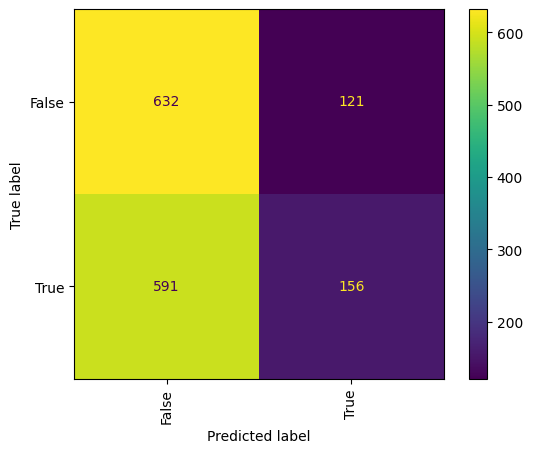

In [31]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
test(clf)

#### Random Forest Classifier

accuracy: 0.6753333333333333


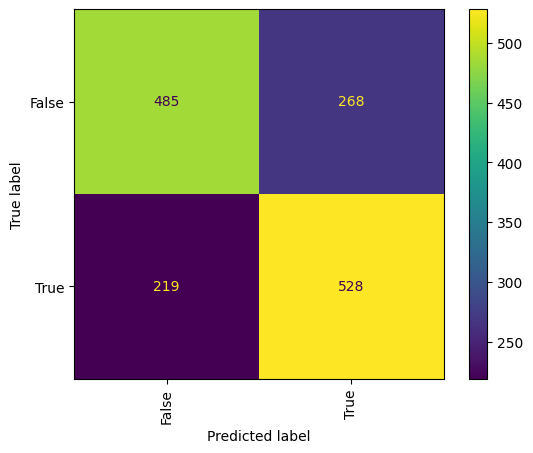

In [32]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=2, random_state=42)
test(clf)

#### Logistic Regression

accuracy: 0.7286666666666667


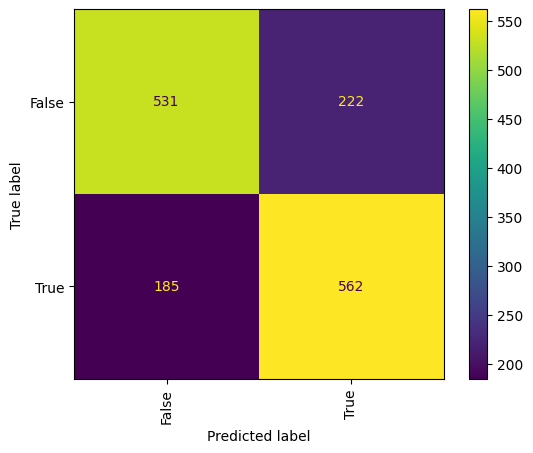

In [33]:
# Logistic Regression ya fue importado anteriormente
clf = LogisticRegression()
test(clf)